# ObsID : 0945020136, SRCNUM : 4, Instru : EMOS1
**Simbad :** Galaxy (2dFGRS TGS322Z047) https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%404738151&Name=2dFGRS%20TGS322Z047&submit=submit

## ESASky

https://sky.esa.int/esasky/?target=52.97008333333333%20-28.304833333333328&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``

- Stack Catalogue name : 4XMMs J033152.7-281818
- IAU name : 4XMM J033152.7-281818
- RA : 03h 31m 52.751s
- DEC : -28° 18' 18.16"

``GAIA``

- Designation : Gaia DR3 5057378691743871360
- RA : 03h 31m 52.742s
- DEC : -28° 18' 18.52"
- Parallax : -0.7065 mas
- Magnitude G (mag) : 19.6328

``GLADE``

- No : 2 124 866
- RA : 03h 31m 52.754s
- DEC : -28° 18' 18.08"
- Distance : 289.8972 Mpc

``2MASS``

- Name : 03315275-2818185
- RA : 03h 31m 52.751s
- DEC : -28° 18' 18.57"

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

### Redshift

In [2]:
def redshift(d_Mpc):
    H0 = 70 # Hubble constant (km/s/Mpc)
    c = 299792.458 # km/s
    return H0*d_Mpc/c

z = redshift(289.8972)
print("Redshift : z =", z)

Redshift : z = 0.06768950805293442


## Fit statistic

In [3]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [4]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp.fits')[0])

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: ObsID0945020136_SRCNUM4_EMOS1_spectrum_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.826e-03 +/- 1.295e-03 (64.0 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-3
  Telescope: XMM Instrument: EMOS1  Channel Type: PI
  Exposure Time: 7689 sec
 Using fit statistic: chi
 Using Background File                ObsID0945020136_SRCNUM4_EMOS1_background_spectrum.fits
  Background Exposure Time: 7686 sec
 Using Response (RMF) File            ObsID0945020136_SRCNUM4_EMOS1.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945020136_SRCNUM4_EMOS1.arf



In [4]:
n_cts = 6.826e-03*7689

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 52.485113999999996

The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.


## Plot spectrum

In [5]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12.0-**")

     1 channels (1) ignored in spectrum #     1
      No channels ignored (no channels in specified range)



(-0.5, 859.5, 665.5, -0.5)

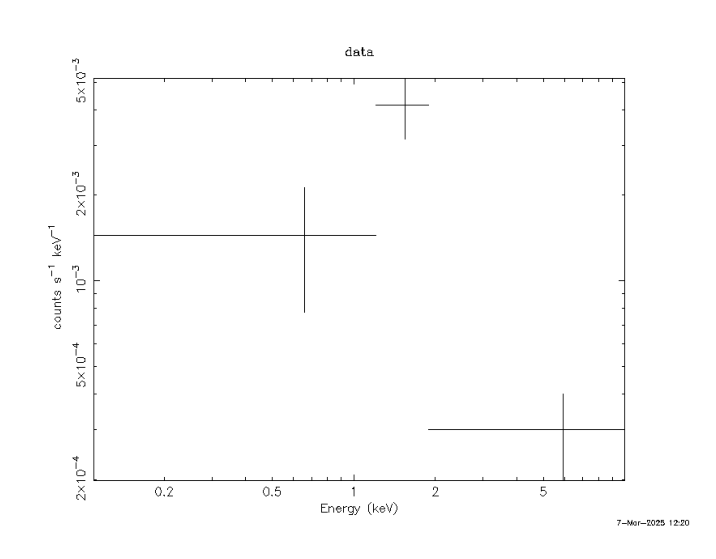

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
**tbabs :**

In [6]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.
Ill-formed Fit problem - number of variable parameters exceeds number of bins


***Warning: Ill-formed Fit problem - number of variable parameters exceeds number of bins


Exception: Error executing command: fit

### Bremsstrahlung model
**tbabs :**

In [8]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________

Ill-formed Fit problem - number of variable parameters exceeds number of bins


***Warning: Ill-formed Fit problem - number of variable parameters exceeds number of bins


Exception: Error executing command: fit

### Apec model
**tbabs :**

In [10]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = moz.zTBabs.nH.values[0]


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9

Ill-formed Fit problem - number of variable parameters exceeds number of bins


***Warning: Ill-formed Fit problem - number of variable parameters exceeds number of bins


Exception: Error executing command: fit

### Powerlaw model
**tbabs :**

In [12]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________

Ill-formed Fit problem - number of variable parameters exceeds number of bins


***Warning: Ill-formed Fit problem - number of variable parameters exceeds number of bins


Exception: Error executing command: fit